# 西安餐饮聚类分析

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans #导入K均值聚类算法
import pylab as mpl  #导入中文字体，避免显示乱码
mpl.rcParams['font.sans-serif']=['SimHei']  #设置为黑体字

poi_gpd=pd.read_pickle('../data/poiAll_gpd.pkl') #读取已经存储为.pkl格式的POI数据，其中包括geometry字段，为GeoDataFrame地理信息数据，可以通过poi_gpd.plot()迅速查看数据。

df = poi_gpd.reset_index()
df = df[df.level_0 == 'poi_0_delicacy']
df = df.dropna(subset = ['detail_info_price','detail_info_overall_rating'],axis =0) #删除缺省值
df.head()

,level_0,level_1,name,location_lat,location_lng,detail_info_tag,detail_info_overall_rating,detail_info_price,geometry
23,poi_0_delicacy,2787,百姓厨房(高新店),34.239950,108.908171,美食;中餐厅,4.5,59,POINT (108.90817 34.23995)
24,poi_0_delicacy,2788,陕西巷子老菜馆(高新店),34.241850,108.911848,美食;中餐厅,4.7,64,POINT (108.91185 34.24185)
25,poi_0_delicacy,2789,莲花餐饮(高新店),34.224543,108.903540,美食;中餐厅,4.3,76,POINT (108.90354 34.22454)
26,poi_0_delicacy,2790,苏福记(紫薇臻品店),34.243518,108.886904,美食;中餐厅,4.6,44.5,POINT (108.88690 34.24352)
27,poi_0_delicacy,2791,大龙燚火锅(高新店),34.241661,108.912056,美食;中餐厅,4.4,106,POINT (108.91206 34.24166)


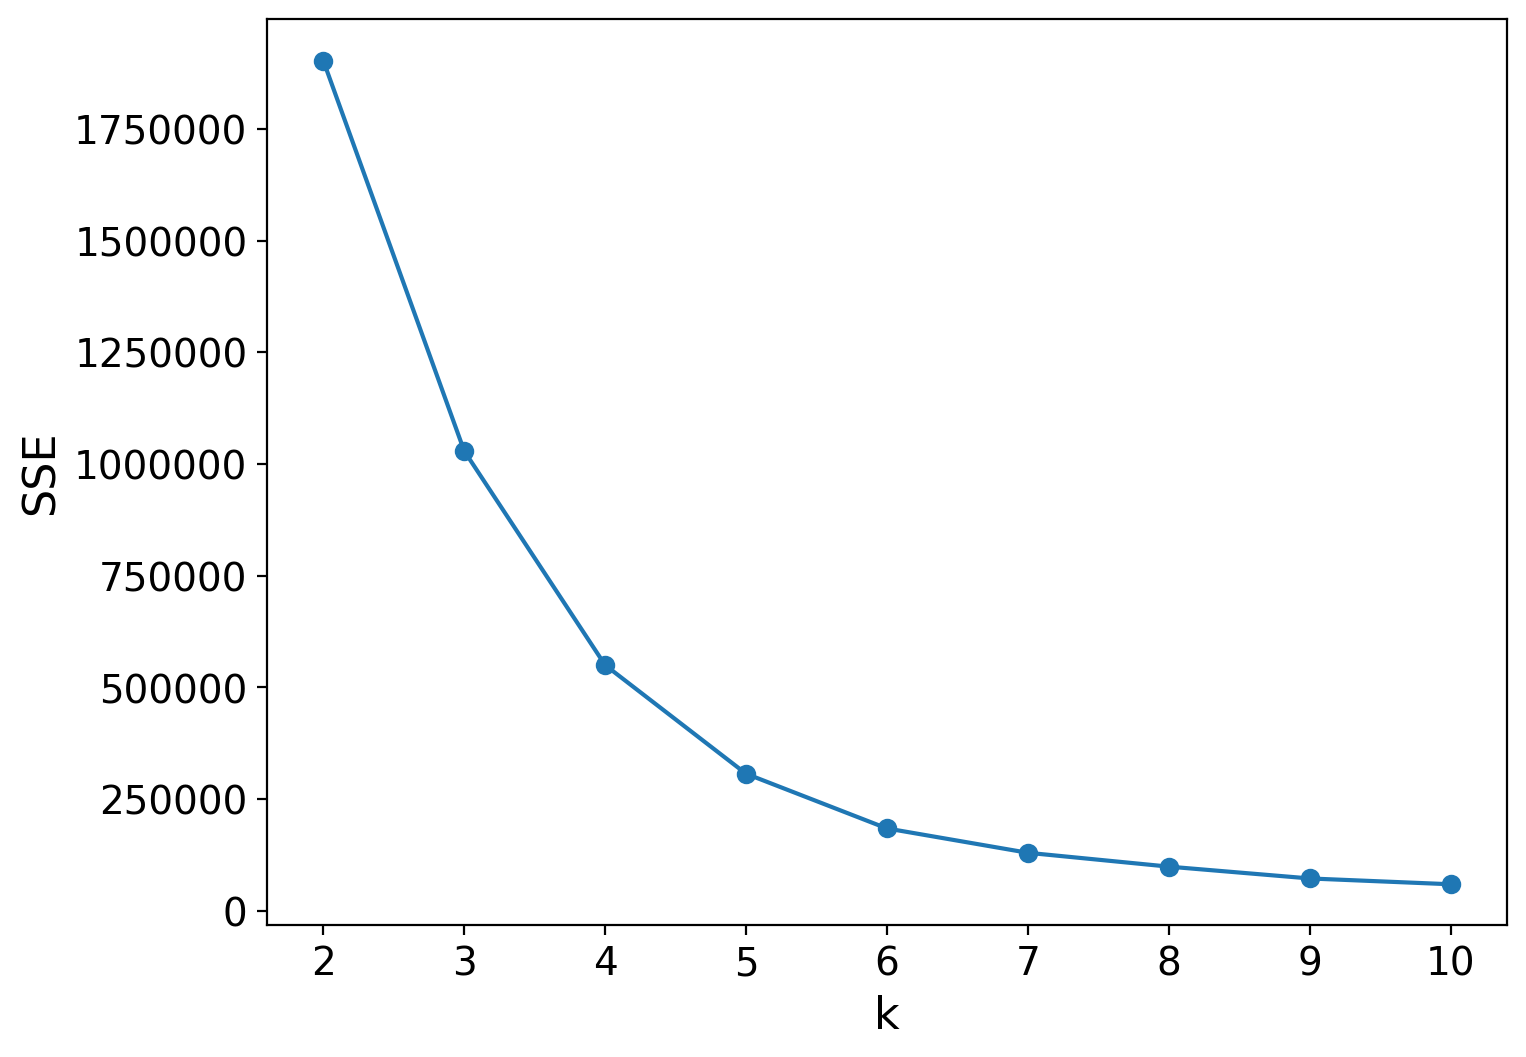

In [9]:
#手肘法看k值
d=[]
for i in range(2,11):    #k取值1~10，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i)
    km.fit(df[['detail_info_price','detail_info_overall_rating']])
    d.append(km.inertia_)  #inertia簇内误差平方和

#生成figure对象
plt.figure(figsize = (8,6), dpi = 200)
plt.plot(range(2,11),d,marker='o')
plt.xlabel('k',fontsize = 16)
plt.ylabel('SSE',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [17]:
# K-means聚类
k = 4
km=KMeans(n_clusters=k)
km.fit(df[['detail_info_price','detail_info_overall_rating']])
df['k_clusters'] = km.labels_
df.head()

,level_0,level_1,name,location_lat,location_lng,detail_info_tag,detail_info_overall_rating,detail_info_price,geometry,k_clusters
23,poi_0_delicacy,2787,百姓厨房(高新店),34.239950,108.908171,美食;中餐厅,4.5,59,POINT (108.90817 34.23995),1
24,poi_0_delicacy,2788,陕西巷子老菜馆(高新店),34.241850,108.911848,美食;中餐厅,4.7,64,POINT (108.91185 34.24185),1
25,poi_0_delicacy,2789,莲花餐饮(高新店),34.224543,108.903540,美食;中餐厅,4.3,76,POINT (108.90354 34.22454),1
26,poi_0_delicacy,2790,苏福记(紫薇臻品店),34.243518,108.886904,美食;中餐厅,4.6,44.5,POINT (108.88690 34.24352),0
27,poi_0_delicacy,2791,大龙燚火锅(高新店),34.241661,108.912056,美食;中餐厅,4.4,106,POINT (108.91206 34.24166),1


In [19]:
price = []
rating = []
for i in range(0,k):
    price_mean = df[df.k_clusters == i]['detail_info_price'].mean()
    rating_mean = df[df.k_clusters == i]['detail_info_overall_rating'].mean()
    price.append(price_mean)
    rating.append(rating_mean)
    print('第{}类：平均价格为 {},  平均评分为 {}'.format(i,round(price_mean,2),round(rating_mean,2)))

第0类：平均价格为 30.08,  平均评分为 4.33
第1类：平均价格为 77.91,  平均评分为 4.33
第2类：平均价格为 1004.0,  平均评分为 4.3
第3类：平均价格为 261.0,  平均评分为 4.39


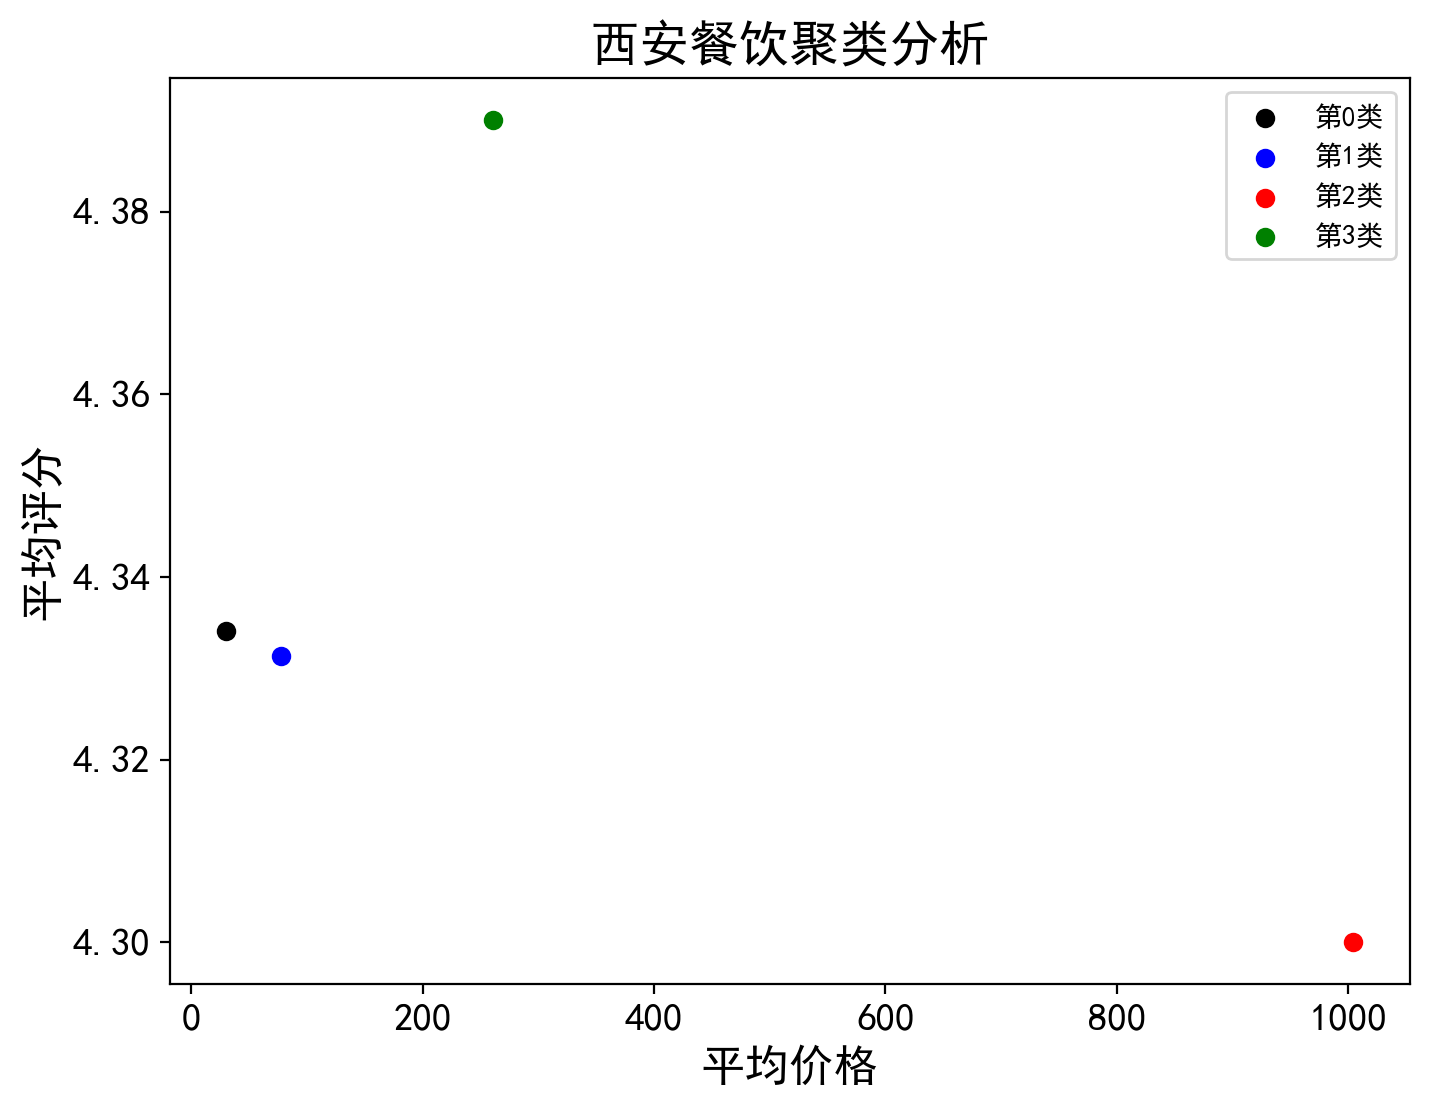

In [22]:
#生成figure对象
labels = ['第0类','第1类','第2类','第3类','第4类','第5类']
colors = ['black','blue','red','green','y','purple']
plt.figure(figsize = (8,6), dpi = 200)
for i in range(0,k):
    plt.scatter(price[i], rating[i], marker='o',c=colors[i],label = labels[i])
plt.xlabel('平均价格',fontsize = 16)
plt.ylabel('平均评分',fontsize = 16)
plt.title('西安餐饮聚类分析',fontsize = 18)
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()